# Person Record File Workflow

## Overview
Functions to obtain and clean data required for the Person Record File in Python using Census API. 

The workflow produces a Person Record (PREC) file that can be linked to the Housing Unit Inventory. The file includes person level records with sex, age, race and ethnicity.

Based on block level data from the 
2010 Census. 

The output of this workflow is a CSV file with the person record file.

The output CSV is designed to be used in the Interdependent Networked Community Resilience Modeling Environment (IN-CORE) for the housing unit allocation model.

IN-CORE is an open source python package that can be used to model the resilience of a community. To download IN-CORE, see:

https://incore.ncsa.illinois.edu/


## Instructions
Users can run the workflow by executing each block of code in the notebook.

Users can modify the code to select one county or multiple counties.

## Description of Program
- program:    ncoda_07dv1_run_PREC_workflow
- task:       Obtain and clean data for Person Record File.
- See github commits for description of program updates
- Current Version:    2022-12-02
- project:    Interdependent Networked Community Resilience Modeling Environment (IN-CORE), Subtask 5.2 - Social Institutions
- funding:	  NIST Financial Assistance Award Numbers: 70NANB15H044 and 70NANB20H008 
- author:     Nathanael Rosenheim

- Suggested Citation:
Rosenheim, Nathanael (2021) “Detailed Household and Housing Unit Characteristics: Data and Replication Code.” DesignSafe-CI. 
https://doi.org/10.17603/ds2-jwf6-s535.

## Step 1: Select the County or Counties
The person record functions run for individual counties in the United States. 
A county is selected by entering the county FIPS code in the data dictionary below.
Multiple counties can be selected by entering a list of county FIPS codes in the data dictionary.
- For each county include the county name, this is used in the codebook.
- For each community (1 county or a group of counties) include the community name, this is used in the codebook.


### Example of data dictionary for one community with one county
```
communities = {'Lumberton_NC' : {
                    'community_name' : 'Lumberton, NC',
                    'counties' : { 
                        1 : {'FIPS Code' : '37155', 'Name' : 'Robeson County, NC'}}}}
```

### Example of data dictionary for one community with multiple counties
```
communities = {'Joplin_MO' : {
                    'community_name' : 'Joplin, MO',
                    'counties' : { 
                        1 : {'FIPS Code' : '29097', 'Name' : 'Jasper County, MO'},
                        2 : {'FIPS Code' : '29145', 'Name' : 'Newton County, MO'}}}}
```

### How to locate your county FIPS code:
- County FIPS codes can be found online at [USDA County FIPS codes](https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697)
- Google search "FIPS code for county [county name]"

## Step 2: Edit the data dictionary
Modify the data dictionary below with your county FIPS Code, name and community name.

In [1]:
# Example of data dictionary for one community with one county
communities = {'Beaumont_TX' : {
                    'community_name' : 'Beaumont, TX',
                    'counties' : { 
                        1 : {'FIPS Code' : '48245', 'Name' : 'Jefferson County, TX'}}}}

## Step 3: Run all of the code blocks in the notebook
To run all of the code blocks in the notebook, find the "Run All" option:
1. If there is a "Run All" button at the top of the notebook then click it.
2. Else, in the "Run" menu, select "Run All Cells"

After all of the code runs (approximately 2 minutes per 50,000 people), the output files (CSV and codebook) will be generated and saved in the folder "OutputData" in the directory where the notebook is saved.

The notebook produces a log file which can be reviewed to see the full workflow process. The workflow depends on internet access to the Census API, which is a publicly available service.


### Setup notebook environment to access Cloned Github Package
This notebook uses functions that are in development. The current version of the package is available at:

https://github.com/npr99/intersect-community-data

Nathanael Rosenheim. (2022). npr99/intersect-community-data. Zenodo. https://doi.org/10.5281/zenodo.6476122

A permanent copy of the package and example datasets are available in the DesignSafe-CI repository:

Rosenheim, Nathanael (2021) “Detailed Household and Housing Unit Characteristics: Data and Replication Code.” DesignSafe-CI. 
https://doi.org/10.17603/ds2-jwf6-s535.

In [2]:
import numpy as np
import pandas as pd
import os # For saving output to path
import sys
import scooby # Reports Python environment

In [3]:
# Generate report of Python environment
print(scooby.Report(additional=['pandas']))


--------------------------------------------------------------------------------
  Date: Fri Dec 02 16:45:05 2022 Central Standard Time

                OS : Windows
            CPU(s) : 12
           Machine : AMD64
      Architecture : 64bit
               RAM : 31.6 GiB
       Environment : Jupyter

  Python 3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 05:37:49)
  [MSC v.1916 64 bit (AMD64)]

            pandas : 1.3.5
             numpy : 1.21.6
             scipy : 1.7.3
           IPython : 7.32.0
        matplotlib : 3.5.1
            scooby : 0.5.12
--------------------------------------------------------------------------------


In [4]:
#To replicate this notebook Clone the Github Package to a folder that is a sibling of this notebook.
# To access the sibling package you will need to append the parent directory ('..') to the system path list.
# append the path of the directory that includes the github repository.
# This step is not required when the package is in a folder below the notebook file.
github_code_path  = ""
sys.path.append(github_code_path)

In [5]:
os.getcwd()

'c:\\Users\\nathanael99\\MyProjects\\IN-CORE\\Tasks\\PublishHUIv2\\HousingUnitInventories_2022-03-03\\ReplicationCode\\intersect-community-data'

In [6]:
# To reload submodules need to use this magic command to set autoreload on
%load_ext autoreload
%autoreload 2
# open, read, and execute python program with reusable commands
from pyncoda.ncoda_07e_generate_prec import generate_prec_functions

In [7]:
version = '3.0.0'
version_text = 'v3-0-0'

# Save Outputfolder - due to long folder name paths output saved to folder with shorter name
# files from this program will be saved with the program name - 
# this helps to follow the overall workflow
outputfolder = "OutputData"
# Make directory to save output
if not os.path.exists(outputfolder):
    os.mkdir(outputfolder)

# Set random seed for reproducibility
seed = 1000
basevintage = 2010

generate_prec_df = generate_prec_functions(
                    communities =   communities,
                    seed =          seed,
                    version =       version,
                    version_text=   version_text,
                    basevintage=    basevintage,
                    outputfolder=   outputfolder
                    )

prec_df = generate_prec_df.generate_prec_v300()


Generating Person Record File v3.0.0 data for Beaumont, TX
Jefferson County, TX : county FIPS Code 48245
Creating folder OutputData/JeffersonCounty_TX to store output.
Creating folder OutputData/JeffersonCounty_TX/00_logfiles
     logfiles Folder purpose: Store text files with log of workflow.
Creating folder OutputData/JeffersonCounty_TX/01_CommunitySourceData
     CommunitySourceData Folder purpose: Source source data files. Helps with software development and replication.
Creating folder OutputData/JeffersonCounty_TX/02_TidyCommunitySourceData
     TidyCommunitySourceData Folder purpose: Cleaned source data and inputs for base inventory.
Creating folder OutputData/JeffersonCounty_TX/03_BaseInventory
     BaseInventory Folder purpose: Initial inventories before random merge. Use as inputs to uncertainty propagation.
Creating folder OutputData/JeffersonCounty_TX/04_RandomMerge
     RandomMerge Folder purpose: Results of random merge with flag columns.
Creating folder OutputData/Jeffer

In [8]:
prec_df.head()

,precid,Tract2010,Block2010,Block2010str,sex,race,hispan,randageP12,agegroupP12,randagePCT12
0,B482450001011000P0001,48245000101,482450001011000,B482450001011000,1,1,0,3,1,4
1,B482450001011000P0002,48245000101,482450001011000,B482450001011000,1,1,0,3,1,2
2,B482450001011000P0003,48245000101,482450001011000,B482450001011000,1,1,0,3,1,4
3,B482450001011000P0004,48245000101,482450001011000,B482450001011000,1,1,0,0,1,3
4,B482450001011000P0005,48245000101,482450001011000,B482450001011000,1,1,0,3,1,1


In [9]:
pd.set_option('display.max_columns', None)
prec_df.groupby(['sex','randagePCT12']).count()

precid  Tract2010  Block2010  Block2010str  race  hispan  \
sex randagePCT12                                                             
1   0               1812       1812       1812          1812  1812    1812   
    1               1724       1724       1724          1724  1724    1724   
    2               1696       1696       1696          1696  1696    1696   
    3               1819       1819       1819          1819  1819    1819   
    4               1646       1646       1646          1646  1646    1646   
...                  ...        ...        ...           ...   ...     ...   
2   103                2          2          2             2     2       2   
    105                1          1          1             1     1       1   
    106                1          1          1             1     1       1   
    107                1          1          1             1     1       1   
    108                1          1          1             1     1       1   

                  randageP12  agegroupP12  
sex randagePCT12                           
1   0                   1812         1812  
    1                   1724         1724  
    2                   1696         1696  
    3                   1819         1819  
    4                   1646         1646  
...                      ...          ...  
2   103                    2            2  
    105                    1            1  
    106                    1            1  
    107                    1            1  
    108                    1            1  

[210 rows x 8 columns]

In [10]:
from pyncoda.ncoda_04c_poptableresults import *

In [11]:
for community in communities.keys():
    community_name = communities[community]['community_name']
print(community_name)

Beaumont, TX


In [12]:
PopResultsTable.pop_results_table(
                  input_df = prec_df, 
                  who = "Total Population by Persons", 
                  what = "by Race, Ethnicity",
                  where = community_name,
                  when = "2010",
                  row_index = "Race",
                  col_index = 'Hispanic')

Hispanic,0 Not Hispanic or Latino (%),1 Hispanic or Latino (%),Total Population by Persons (%)
Race,,,
1. White,"112,503 (53.8%)","19,071 (44.3%)","131,574 (52.2%)"
2. Black or African American,"84,502 (40.4%)",789 (1.8%),"85,291 (33.8%)"
3. American Indian and Alaska Native,739 (0.4%),642 (1.5%),"1,381 (0.5%)"
4. Asian,"8,518 (4.1%)",112 (0.3%),"8,630 (3.4%)"
5. Native Hawaiian and Other Pacific Islander,64 (0.0%),19 (0.0%),83 (0.0%)
6. Some Other Race,210 (0.1%),"20,143 (46.8%)","20,353 (8.1%)"
7. Two or More Races,"2,710 (1.3%)","2,251 (5.2%)","4,961 (2.0%)"
Total,"209,246 (100.0%)","43,027 (100.0%)","252,273 (100.0%)"


#### Validate the Person Record File
The population count totals for the community will match data collected for the 2010 Decennial Census. This can be confirmed by going to data.census.gov

The population by Hispanic will not match exactly but will be fairly close. The data for race, sex, and age by Hispanic requires a random merge and will vary based on the random see used in the algorithm.

Total Population by Race and Ethnicity: https://data.census.gov/cedsci/table?g=0500000US48245&tid=DECENNIALSF12010.P5

### Population Pyramid
work on making a population pyramid using the data.

#### See Examples:
ggplot for python = plotnine:

https://towardsdatascience.com/how-to-use-ggplot2-in-python-74ab8adec129

My example of a population pyramid using R:

Rosenheim, Nathanael. Population Pyramid Data and R Script for the US, States, and Counties 1970 - 2017. Ann Arbor, MI: Inter-university Consortium for Political and Social Research [distributor], 2020-01-23. https://doi.org/10.3886/E117081V2

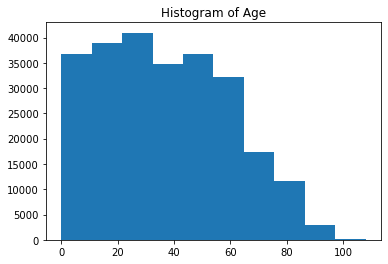

In [13]:
import matplotlib.pyplot as plt
plt.hist(prec_df['randagePCT12'])
plt.title("Histogram of Age")
plt.show()

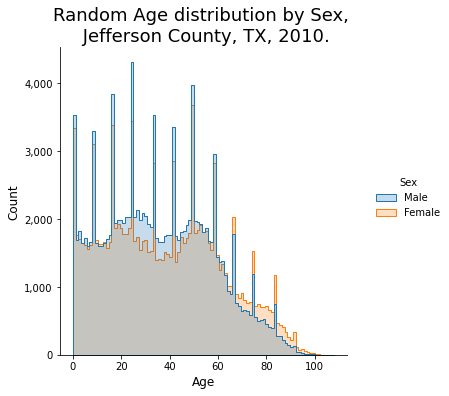

In [14]:
# try distribution plot from figures
from pyncoda.ncoda_04a_Figures import *
from pyncoda.CommunitySourceData.api_census_gov.acg_00g_prec_datastructure \
    import prec_v300_DataStructure

# Distribution Plot
income_distribution(prec_df,
                        variable = "randagePCT12",
                        by_variable = "sex",
                        xlabel_string = "Age",
                        datastructure = prec_v300_DataStructure,
                        communities = communities,
                        community = community,
                        year = 2010,
                        savefile = False,
                        notes = False)

In [15]:
age80 = (prec_df['randagePCT12'] > 10)
age85 = (prec_df['randagePCT12'] < 15)
conditions = age80 & age85
prec_df.loc[conditions]

,precid,Tract2010,Block2010,Block2010str,sex,race,hispan,randageP12,agegroupP12,randagePCT12
7,B482450001011000P0008,48245000101,482450001011000,B482450001011000,1,1,0,11,3,14
8,B482450001011000P0009,48245000101,482450001011000,B482450001011000,1,1,0,11,3,12
56,B482450001011000P0057,48245000101,482450001011000,B482450001011000,2,1,0,12,3,14
57,B482450001011000P0058,48245000101,482450001011000,B482450001011000,2,1,0,10,3,11
58,B482450001011000P0059,48245000101,482450001011000,B482450001011000,2,1,0,13,3,14
...,...,...,...,...,...,...,...,...,...,...
252130,B482450002002016P0072,48245000200,482450002002016,B482450002002016,1,2,1,12,3,14
252141,B482450001031015P0243,48245000103,482450001031015,B482450001031015,2,2,1,11,3,12
252178,B482450026005018P0062,48245002600,482450026005018,B482450026005018,2,2,1,11,3,12
252185,B482450003082020P0861,48245000308,482450003082020,B482450003082020,2,2,1,11,3,11


In [16]:
# List of all communities available in IN-CORE
communities = {'Lumberton_NC' : {
                    'community_name' : 'Lumberton, NC',
                    'counties' : { 
                        1 : {'FIPS Code' : '37155', 'Name' : 'Robeson County, NC'}}},                   
                'Shelby_TN' : {
                    'community_name' : 'Memphis, TN',
                    'counties' : { 
                        1 : {'FIPS Code' : '47157', 'Name' : 'Shelby County, TN'}}},
                'Joplin_MO' : {
                    'community_name' : 'Joplin, MO',
                    'counties' : { 
                        1 : {'FIPS Code' : '29097', 'Name' : 'Jasper County, MO'},
                        2 : {'FIPS Code' : '29145', 'Name' : 'Newton County, MO'}}},
                'Seaside_OR' : {
                    'community_name' : 'Seaside, OR',
                    'counties' : { 
                        1 : {'FIPS Code' : '41007', 'Name' : 'Clatsop County, OR'}}},                   
                'Galveston_TX' : {
                    'community_name' : 'Galveston, TX',
                    'counties' : { 
                        1 : {'FIPS Code' : '48167', 'Name' : 'Galveston County, TX'}}},
                'Mobile_AL' : {
                    'community_name' : 'Mobile, AL',
                    'counties' : { 
                        1 : {'FIPS Code' : '01097', 'Name' : 'Mobile County, AL'}}}                    
                }